In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_df = pd.read_csv('data/train.csv')

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
survived_numbers = train_df['Survived'].value_counts().reset_index()

In [126]:
survived_numbers

,index,Survived
0,0,549
1,1,342


([<matplotlib.axis.XTick at 0x7f9f13cc63d0>,
 <a list of 2 Text xticklabel objects>)

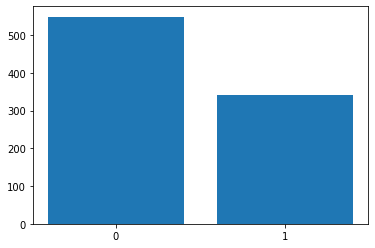

In [132]:
plt.bar(survived_numbers['index'], survived_numbers['Survived'])
plt.xticks(survived_numbers['index'])

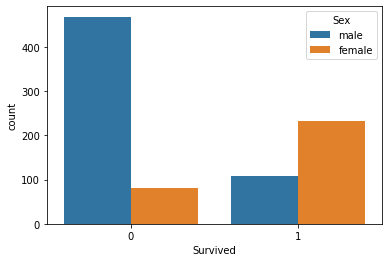

In [135]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

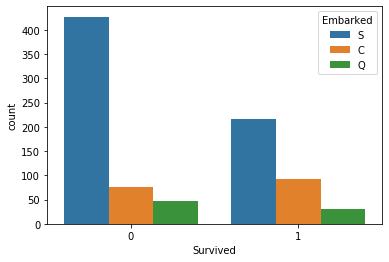

In [136]:
sns.countplot(x='Survived', hue='Embarked', data=train_df)

In [147]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [148]:
features = ['Sex', 'Embarked']

In [150]:
from sklearn.linear_model import LogisticRegression

In [170]:
train_X = train_df.filter(items=features)

In [175]:
train_X['Sex'] = pd.get_dummies(train_X['Sex'])
train_X['Embarked'] = pd.factorize(train_X['Embarked'])[0]

In [152]:
train_y = train_df['Survived']

In [153]:
logisticRegressionModel = LogisticRegression(random_state=1)

In [176]:
logisticRegressionModel.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
test_df = pd.read_csv('data/test.csv')

In [179]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [180]:
test_X = test_df.filter(items=features)

In [181]:
test_X['Sex'] = pd.get_dummies(test_X['Sex'])
test_X['Embarked'] = pd.factorize(test_X['Embarked'])[0]

In [182]:
test_X.head()

,Sex,Embarked
0,0,0
1,1,1
2,0,0
3,0,1
4,1,1


In [183]:
predicted_y = logisticRegressionModel.predict(test_X)

In [184]:
predicted_y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [186]:
sample_submission = pd.read_csv('data/gender_submission.csv')

In [187]:
sample_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [189]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [188]:
submission = pd.DataFrame({ 
    'PassengerID': test_df['PassengerId'],
    'Survived': predicted_y
})

In [190]:
submission.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [192]:
submission.to_csv('data/sex_embark_submission', index=False)